In [1]:


import numpy as np


# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')
     


In [8]:
def create_ds(N=100, slope=1.234, noise_stddev=.1, random_state=0):
    
    random_state = np.random.RandomState(int(random_state))
    x_N = np.linspace(-2,3,N)
    
    y_N = slope * x_N + random_state.randn(N) * noise_stddev
    return x_N,y_N

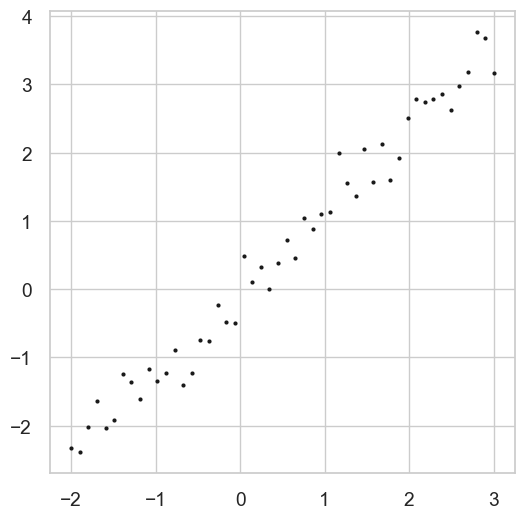

In [10]:
x_N, y_N = create_ds(50,noise_stddev=.3,random_state=42)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))
plt.plot(x_N,y_N,'k.');


#y_hat = w.x
loss = j(w) = (y_hat -(w.x))**2

In [22]:
def calc_grad(w):
    g = (2 * w * np.sum(np.square(x_N))) - (2 * np.sum(y_N * x_N))
    return g

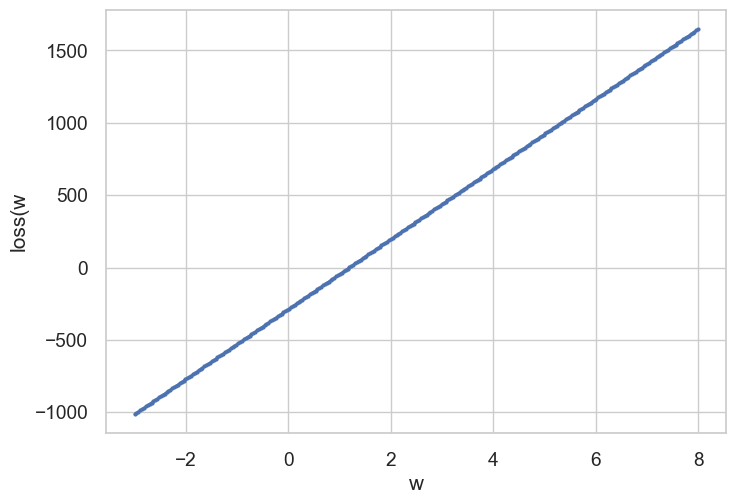

In [23]:
w_grid = np.linspace(-3,8, 300)

loss_grid = np.asarray([calc_grad(w) for w in w_grid])

plt.plot(w_grid,loss_grid,'b.-')
plt.xlabel('w')
plt.ylabel('loss(w');

iteration 0, cost: 1.499260
iteration 1, cost: 1.030143
iteration 2, cost: 0.625866
iteration 3, cost: 0.222934
iteration 4, cost: 0.379946
iteration 5, cost: 0.178885
iteration 6, cost: 0.819226
iteration 7, cost: 0.426848
iteration 8, cost: 0.180210
iteration 9, cost: 0.415487
iteration 10, cost: 0.188414
iteration 11, cost: 0.262706
iteration 12, cost: 0.174834
iteration 13, cost: 0.222036
iteration 14, cost: 0.176746
iteration 15, cost: 0.188192
iteration 16, cost: 0.175822
iteration 17, cost: 0.175380
iteration 18, cost: 0.172073
iteration 19, cost: 0.170640
iteration 20, cost: 0.169764
iteration 21, cost: 0.169614
iteration 22, cost: 0.170043
iteration 23, cost: 0.170912
iteration 24, cost: 0.172075
iteration 25, cost: 0.173401
iteration 26, cost: 0.174794
iteration 27, cost: 0.176192
iteration 28, cost: 0.177559
iteration 29, cost: 0.178877
iteration 30, cost: 0.180139
iteration 31, cost: 0.181342
iteration 32, cost: 0.182486
iteration 33, cost: 0.183573
iteration 34, cost: 0.18

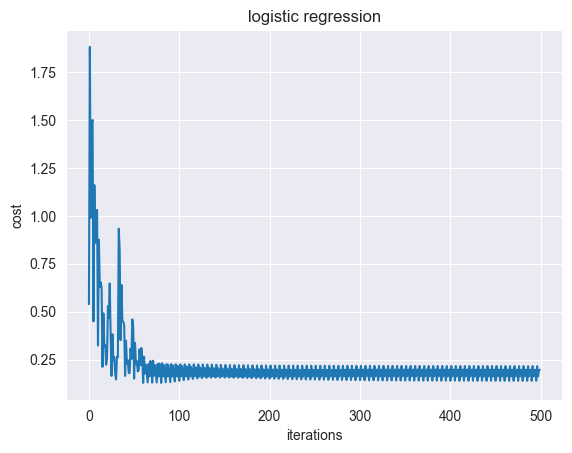

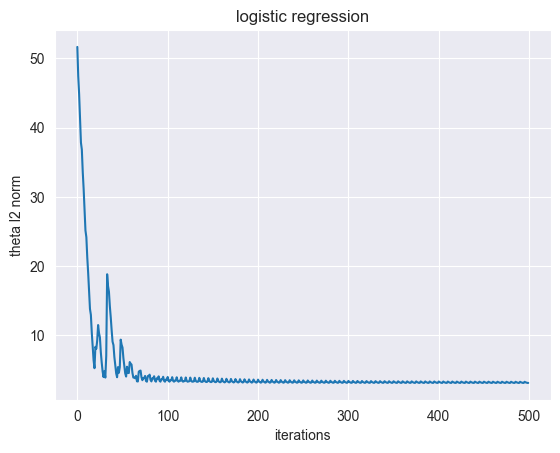

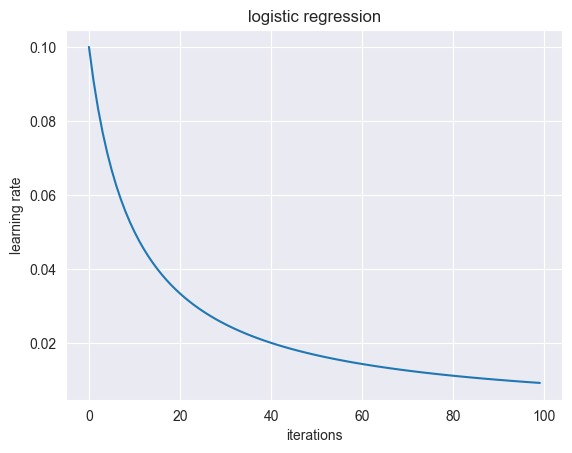

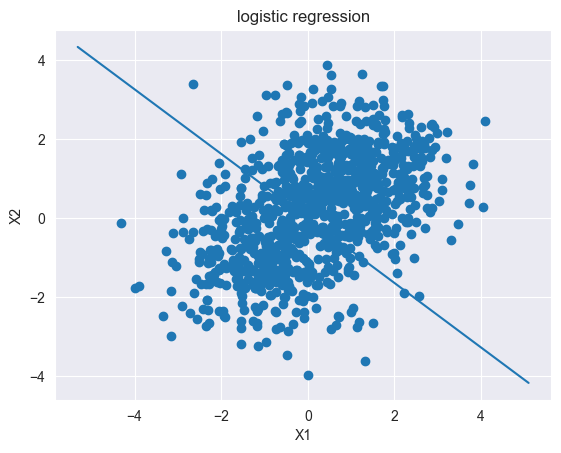

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():

    n = 1000
    mu1 = np.array([1,1])
    mu2 = np.array([-1,-1])
    pik = np.array([0.4,0.6])

    X = np.zeros((n,2))
    y = np.zeros((n,1))

    for i in range(1,n):
        u = np.random.rand()
        idx = np.where(u < np.cumsum(pik))[0]

        if (len(idx)==1):
            X[i,:] = np.random.randn(1,2) + mu1
            y[i] = 1
        else:
            X[i,:] = np.random.randn(1,2) + mu2
            y[i] = -1

    return X, y


class sgdlr:

    def __init__(self):

        self.num_iter = 100
        self.lmbda = 1e-9

        self.tau0 = 10
        self.kappa = 1
        self.eta = np.zeros(self.num_iter)

        self.batch_size = 200

    def fit(self, X, y):

        #random init
        theta = np.random.randn(X.shape[1],1)

        #learning rate schedule
        for i in range(self.num_iter):
            self.eta[i] = (self.tau0+i)**(-self.kappa)

            #divide data in batches        
        batch_data, batch_labels = self.make_batches(X,y,self.batch_size)
        num_batches = batch_data.shape[0]
        num_updates = 0

        J_hist = np.zeros((self.num_iter * num_batches,1))
        t_hist = np.zeros((self.num_iter * num_batches,1))

        for itr in range(self.num_iter):
            for b in range(num_batches):
                Xb = batch_data[b]
                yb = batch_labels[b]

                J_cost, J_grad = self.lr_objective(theta, Xb, yb, self.lmbda)
                theta = theta - self.eta[itr]*(num_batches*J_grad)

                J_hist[num_updates] = J_cost
                t_hist[num_updates] = np.linalg.norm(theta,2)
                num_updates = num_updates + 1
            print("iteration %d, cost: %f" %(itr, J_cost))

        y_pred = 2*(self.sigmoid(X.dot(theta)) > 0.5) - 1
        y_err = np.size(np.where(y_pred - y)[0])/float(y.shape[0])
        print("classification error:", y_err)

        self.generate_plots(X, J_hist, t_hist, theta)
        return theta

    def make_batches(self, X, y, batch_size):
        n = X.shape[0]
        d = X.shape[1]
        num_batches = int(np.ceil(n/batch_size))

        groups = np.tile(range(num_batches),batch_size)
        batch_data=np.zeros((num_batches,batch_size,d))
        batch_labels=np.zeros((num_batches,batch_size,1))

        for i in range(num_batches):
            batch_data[i,:,:] = X[groups==i,:]
            batch_labels[i,:] = y[groups==i]

        return batch_data, batch_labels

    def lr_objective(self, theta, X, y, lmbda):

        n = y.shape[0]
        y01 = (y+1)/2.0

        #compute the objective
        mu = self.sigmoid(X.dot(theta))

        #bound away from 0 and 1
        eps = np.finfo(float).eps
        mu = np.maximum(mu,eps)
        mu = np.minimum(mu,1-eps)

        #compute cost
        cost = -(1/n)*np.sum(y01*np.log(mu)+(1-y01)*np.log(1-mu))+np.sum(lmbda*theta*theta)

        #compute the gradient of the lr objective
        grad = X.T.dot(mu-y01) + 2*lmbda*theta

        #compute the Hessian of the lr objective
        #H = X.T.dot(np.diag(np.diag( mu*(1-mu) ))).dot(X) + 2*lmbda*np.eye(np.size(theta))

        return cost, grad

    def sigmoid(self, a):
        return 1/(1+np.exp(-a))

    def generate_plots(self, X, J_hist, t_hist, theta):

        plt.figure()
        plt.plot(J_hist)
        plt.title("logistic regression")
        plt.xlabel('iterations')
        plt.ylabel('cost')
        #plt.savefig('./figures/lrsgd_loss.png')
        plt.show()

        plt.figure()
        plt.plot(t_hist)
        plt.title("logistic regression")
        plt.xlabel('iterations')
        plt.ylabel('theta l2 norm')
        #plt.savefig('./figures/lrsgd_theta_norm.png')
        plt.show()

        plt.figure()
        plt.plot(self.eta)
        plt.title("logistic regression")
        plt.xlabel('iterations')
        plt.ylabel('learning rate')
        #plt.savefig('./figures/lrsgd_learning_rate.png')
        plt.show()

        plt.figure()
        x1 = np.linspace(np.min(X[:,0])-1,np.max(X[:,0])+1,10)
        plt.scatter(X[:,0], X[:,1])
        plt.plot(x1, -(theta[0]/theta[1])*x1)
        plt.title('logistic regression')
        plt.grid(True)
        plt.xlabel('X1')
        plt.ylabel('X2')
        #plt.savefig('./figures/lrsgd_clf.png')
        plt.show()

if __name__ == "__main__":

    X, y = generate_data()
    sgd = sgdlr()
    theta = sgd.fit(X,y)



In [1]:
import matplotlib.pyplot as plt
import numpy as np

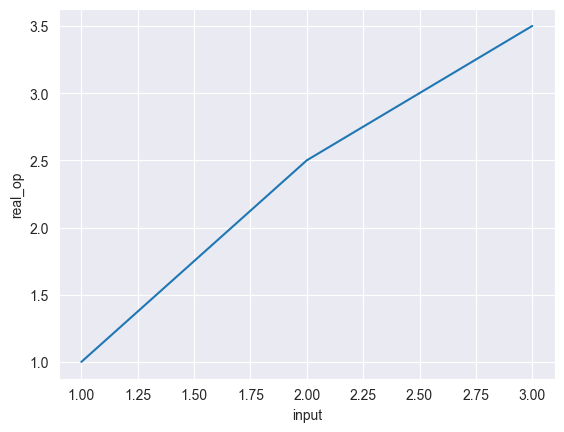

In [3]:
X = [1,2,3]
y=[1,2.5,3.5]
plt.figure()
plt.plot(X,y)
plt.xlabel("input")
plt.ylabel("real_op")
plt.show()

In [10]:
hyps = [.5,1,1.5,.75,1.25] #slope

def mul_mat(mat,theta):
    mutated=[]
    for i in range(len(mat)):
        mutated.append(mat[i] * theta)
    return mutated

In [6]:
def cal_cost(m,pred_op,actual_op):
    total=0
    for i in range(m):
        sq_er = (pred_op[i] - actual_op[i]) ** 2
        total+=sq_er
    return total/(2*m)

In [11]:
for i in range(len(hyps)):
    
    hyp_vals = mul_mat(X,hyps[i])
    print(f'Cost for {hyps[i]} is {cal_cost(len(X),y,hyp_vals)}')

Cost for 0.5 is 1.0833333333333333
Cost for 1 is 0.08333333333333333
Cost for 1.5 is 0.25
Cost for 0.75 is 0.4375
Cost for 1.25 is 0.020833333333333332


In [45]:
import  numpy as np

X = np.array([[1],[2],[3]])

y = np.array([[1],[2.5],[3.5]])

X.shape[0]

3

In [36]:
get_theta = lambda theta : np.array([[0,theta]])

In [37]:
thetas = list(map(get_theta,[.5,1,1.5]))
print(thetas)

[array([[0. , 0.5]]), array([[0, 1]]), array([[0. , 1.5]])]


In [38]:
import numpy

X=np.hstack([np.ones([3,1]),X])

print(X)


[[1. 1.]
 [1. 2.]
 [1. 3.]]


In [39]:

with numpy.printoptions():
    print(X)

 

[[1. 1.]
 [1. 2.]
 [1. 3.]]


In [33]:
def cost(X,y,theta):
    inner = np.power(((X @ theta.T) - y),2 )
    return np.sum(inner) / (2 * len(X))

In [42]:
for i in range(len(thetas)):
    print(f" {X[i]=}, {y[i]=} , cost = {cost(X,y,thetas[i])}")

 X[i]=array([1., 1.]), y[i]=array([1.]) , cost = 1.0833333333333333
 X[i]=array([1., 2.]), y[i]=array([2.5]) , cost = 0.08333333333333333
 X[i]=array([1., 3.]), y[i]=array([3.5]) , cost = 0.25


In [46]:
import numpy as np

# Input features and target values
X_raw = np.array([[1], [2], [3]])
y = np.array([[1], [2.5], [3.5]])

input_len=X_raw.shape[0]
# Add a column of ones for the intercept using np.c_[] (column-wise concat)
X = np.c_[np.ones(input_len), X_raw]

# Create theta vectors with 0 intercept and different slopes
def make_theta(slope: float) -> np.ndarray:
    return np.array([[0, slope]])

theta_values = [0.5, 1.0, 1.5]
thetas = [make_theta(slope) for slope in theta_values]

# Cost function: Mean Squared Error
def compute_cost(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    predictions = X @ theta.T
    errors = predictions - y
    return np.mean(np.square(errors)) / 2

# Evaluate and print cost for each theta
for theta in thetas:
    cost = compute_cost(X, y, theta)
    print(f"Theta: {theta.flatten()}, Cost: {cost:.4f}")


Theta: [0.  0.5], Cost: 1.0833
Theta: [0. 1.], Cost: 0.0833
Theta: [0.  1.5], Cost: 0.2500
